<a href="https://colab.research.google.com/github/NiccoloSalvi/naml/blob/main/image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/NAML/lab1/')

Mounted at /content/drive


# Image compression through Singular Value Decomposition

## Load a picture as a 3-dimensional `np.array`

In [4]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
image_path = "TarantulaNebula.jpg"
# image_path = "italyFlag.png"

A = imread(image_path)

Visualize the picture

(-0.5, 629.5, 566.5, -0.5)

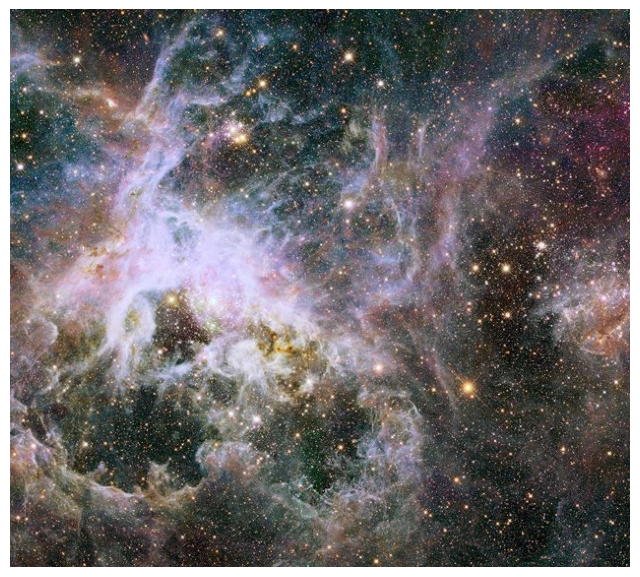

In [26]:
img = plt.imshow(A)
plt.axis('off')

## Convert the picture to gray-scale and visualize it.

There two main different methods:

1. **Weighted sum of the RGB components**
    
 $$Gray=0.2989×R+0.5870×G+0.1140×B$$
    
 This formula reflects the human eye's sensitivity to different colors, with green having the highest weight.
2. **Average method**

 Calculates the arithmetic mean of the values of the three color channels for each pixel. This approach is straightforward but does not account for the different sensitivities of the human eye to various colors.

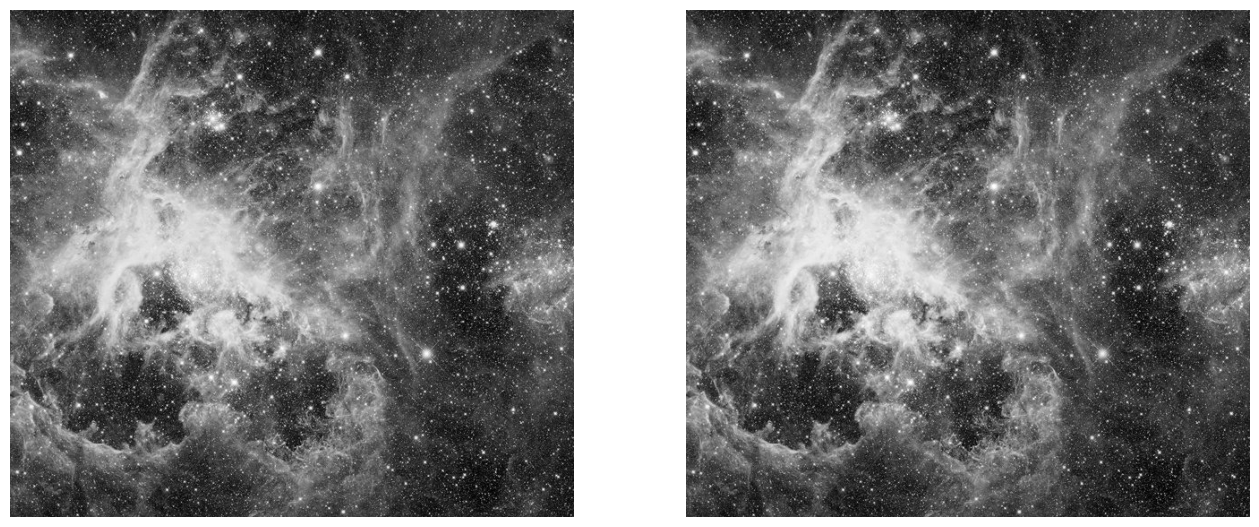

In [5]:
# first method
A_r = A[:, :, 0]
A_g = A[:, :, 1]
A_b = A[:, :, 2]
A_ws = 0.2989 * A_r + 0.5870 * A_g + 0.1140 * A_b

# second method
A_avg = np.mean(A, axis=2)

# display both images
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].axis('off')
axes[1].axis('off')

axes[0].imshow(A_ws, cmap='gray')
axes[1].imshow(A_avg, cmap='gray')

## Perform the SVD decomposition

### **Brief Description:**

This code visualizes three key properties of the singular values obtained from the Singular Value Decomposition (SVD) of a matrix `A_avg`:

1. **The trend of singular values** ($ \sigma_k $).
2. **The cumulative fraction of singular values** ($\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$).
3. **The fraction of the "explained variance"** ($\sqrt{\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}}$).

These plots help in understanding the **importance of each singular value** and how much of the matrix's structure is captured by the first few singular values.

### **Key Steps:**

1. **Compute SVD of the Matrix `A_avg`:**
   - `U, S, VT = np.linalg.svd(A_avg, full_matrices=False)` extracts the singular values (`S`) and singular vectors (`U`, `VT`).

2. **Plot the Singular Value Trend:**
   - Plots $ \sigma_k $ (the singular values) on a **logarithmic scale** to visualize the rapid decay of singular values.

3. **Plot the Cumulative Fraction of Singular Values:**
   - Shows how the **cumulative sum** of singular values changes as you include more singular values.

4. **Plot the Fraction of Explained Variance:**
   - Displays how the **cumulative energy** (sum of squared singular values) changes with increasing \( k \), indicating the **variance captured** by the rank-\( k \) approximation.

### **Important Points to Remember:**

1. **Logarithmic Scale for Singular Values:**
   - Singular values often decay rapidly, making a **logarithmic scale** ideal for visualizing the trend clearly.

2. **Cumulative Fraction of Singular Values:**
   - Represents how **much of the total singular values** is captured as you add more singular values.
   - Use `np.cumsum(S) / np.sum(S)` to compute this.

3. **Fraction of Explained Variance:**
   - Measures the **cumulative variance** explained by the first \( k \) singular values.
   - Use `np.sqrt(np.cumsum(S ** 2) / np.sum(S ** 2))` to compute this.

4. **Titles and Axis Labels:**
   - Clearly label each plot with descriptive titles and axis labels to convey the purpose of each visualization.

### **Usage Scenario:**

These visualizations are particularly useful for:

1. **Understanding the Matrix Structure:**
   - Helps determine the **intrinsic rank** and **energy distribution** of the matrix.

2. **Choosing Optimal Rank \( k \):**
   - Allows you to select the **best rank \( k \)** for **dimensionality reduction** or **data compression** without losing much information.

3. **Assessing Approximation Quality:**
   - The **cumulative fraction** and **explained variance** plots show how quickly the matrix can be approximated using a few singular values.

By keeping these points in mind, this description will serve as a helpful reminder when revisiting this code in the future. Let me know if you'd like to refine it further or add more details!

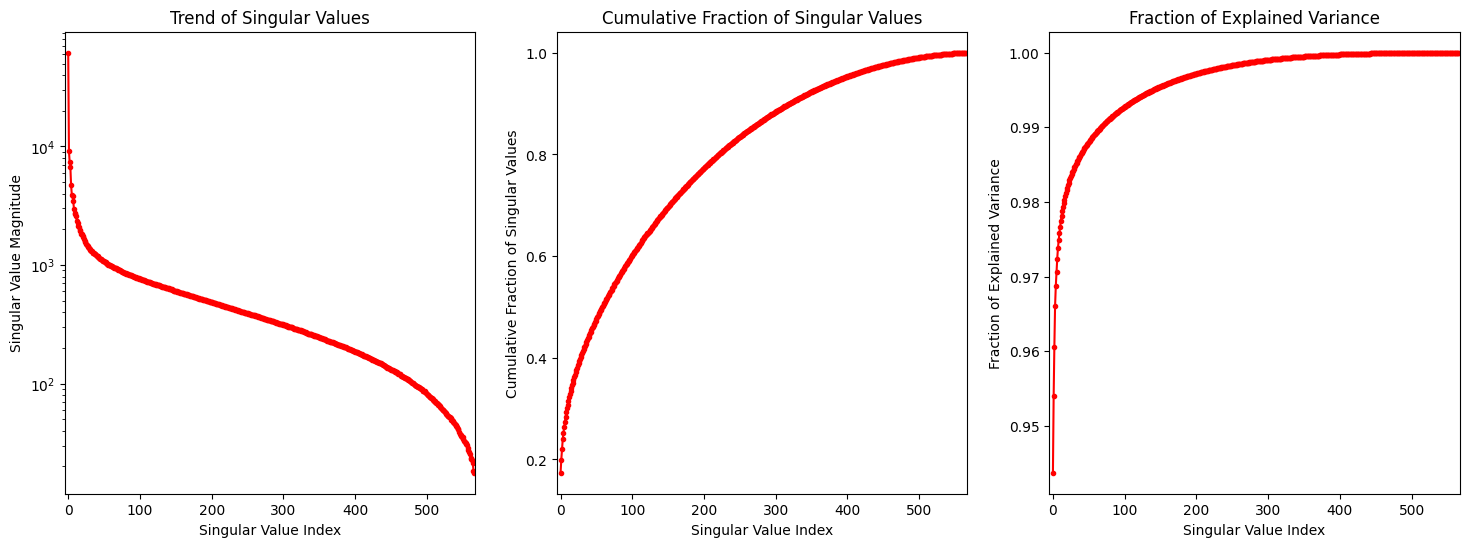

In [6]:
# Perform SVD on the matrix A_avg and extract singular values
U, S, VT = np.linalg.svd(A_avg, full_matrices=False)

# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# 1. Plot the trend of singular values (Sigma_k)
axes[0].plot(S, marker='.', linestyle='-', color='r')
axes[0].set_yscale("log")  # Set y-axis to logarithmic scale to show rapid decay
axes[0].set_xlim(-5, S.shape[0])  # Adjust x-axis limits for better visualization
axes[0].set_xlabel("Singular Value Index")  # Label for x-axis
axes[0].set_ylabel("Singular Value Magnitude")  # Label for y-axis
axes[0].set_title("Trend of Singular Values")  # Title of the first subplot

# 2. Plot the cumulative fraction of singular values
# Formula: Sum of first k singular values divided by the total sum of singular values
axes[1].plot(np.cumsum(S) / np.sum(S), marker=".", linestyle="-", color="r")
axes[1].set_xlim(-5, S.shape[0])  # Adjust x-axis limits
axes[1].set_xlabel("Singular Value Index")  # Label for x-axis
axes[1].set_ylabel("Cumulative Fraction of Singular Values")  # Label for y-axis
axes[1].set_title("Cumulative Fraction of Singular Values")  # Title of the second subplot

# 3. Plot the fraction of explained variance
# Formula: sqrt( Sum of squared singular values up to k / Total sum of squared singular values )
axes[2].plot(np.sqrt(np.cumsum(S ** 2) / np.sum(S ** 2)), marker=".", linestyle="-", color="r")
axes[2].set_xlim(-5, S.shape[0])  # Adjust x-axis limits
axes[2].set_xlabel("Singular Value Index")  # Label for x-axis
axes[2].set_ylabel("Fraction of Explained Variance")  # Label for y-axis
axes[2].set_title("Fraction of Explained Variance")  # Title of the third subplot

# Display the combined plots
plt.show()

## Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

### **Brief Description:**

This code evaluates and visualizes the **reconstruction error** of different **rank-\( k \)** approximations of a matrix \( A \). The goal is to find the **best rank-\( k \)** approximation with the **smallest reconstruction error** compared to the original matrix. The **Frobenius norm** is used to measure the error between the original matrix `A_avg` and the approximated matrix `A_k` for each rank \( k \).

### **Key Steps:**

1. **Compute the rank-\( k \) approximations** using the first \( k \) singular values and vectors.
2. **Calculate the Frobenius norm error** for each approximation.
3. **Find the rank-\( k \) with the smallest error**, which indicates the best approximation.
4. **Plot the errors** for different values of \( k \) to visualize the trend.

### **Important Points to Remember:**

1. **Matrix Reconstruction:** The rank-\( k \) approximation \( A_k = U_k \Sigma_k V^\top_k \) uses only the top \( k \) singular values and vectors.
2. **Error Calculation:** The **Frobenius norm** measures the reconstruction error, defined as the square root of the sum of the squared differences between the original and approximated matrix elements.
3. **Best Rank-\( k \):** The optimal \( k \) is the one that minimizes this error, indicating that it captures the most significant information from the original matrix.

### **Usage Scenario:**

This code is useful for analyzing the **trade-off** between the **rank** of the approximation and the **reconstruction accuracy**. It helps in choosing a suitable rank \( k \) for **dimensionality reduction** or **matrix compression** without losing too much information.

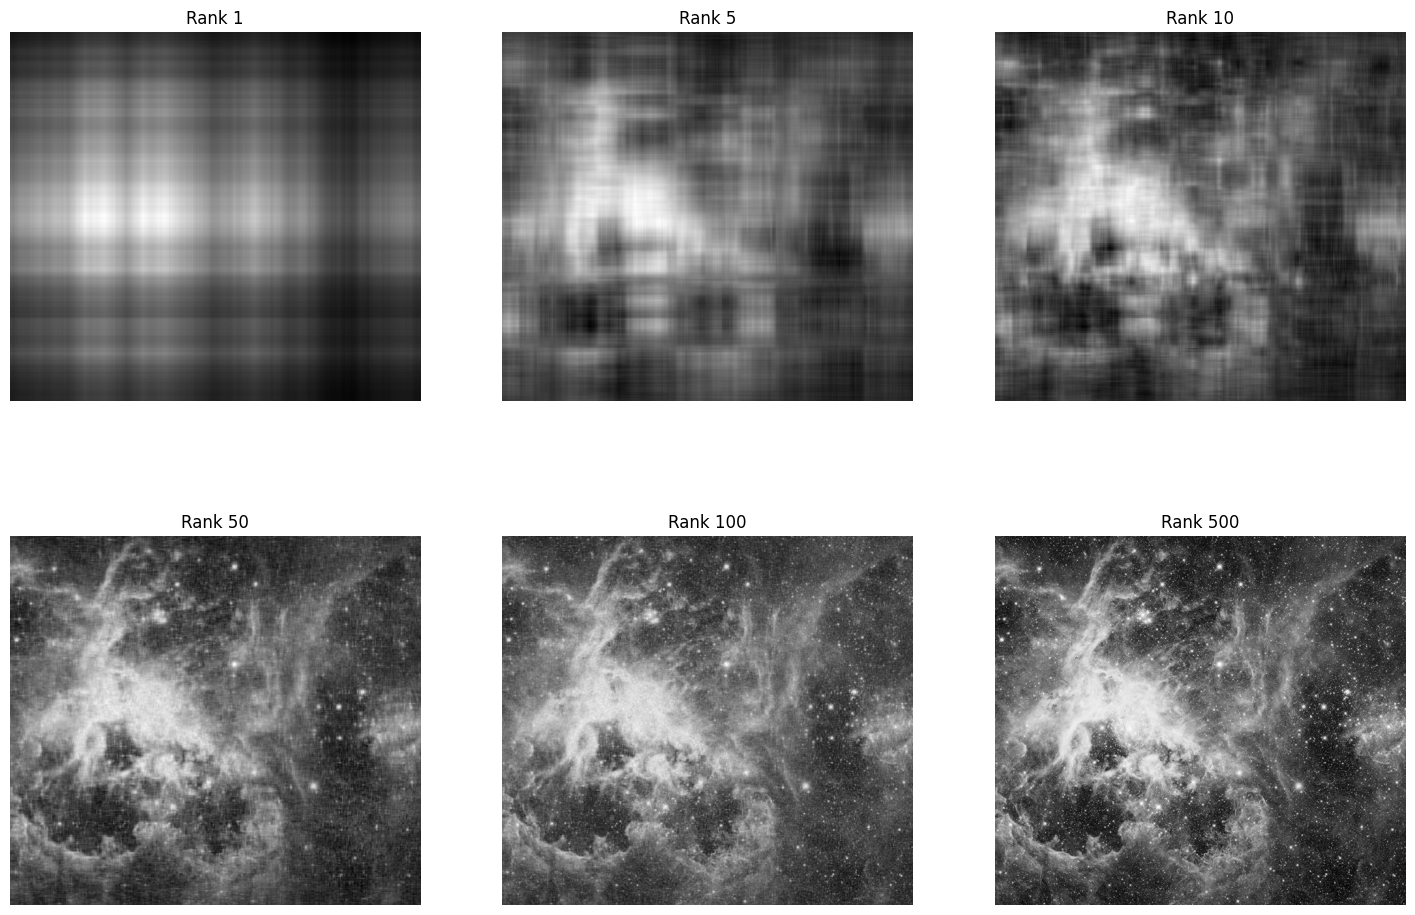

The best rank-k approximation is achieved with k = 500, with the smallest error = 438.85


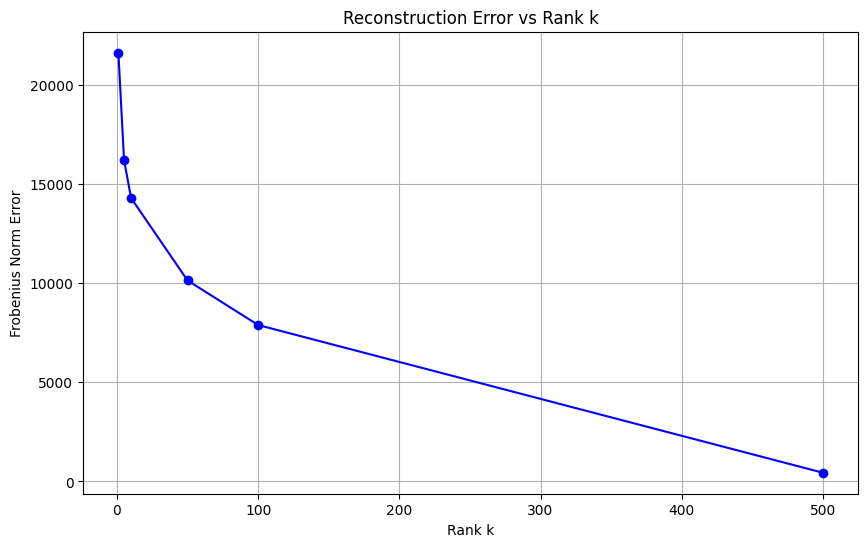

In [10]:
# Initialize an empty list to store reconstruction errors for each rank-k approximation
errors = []

# Define the list of k values to evaluate (rank of the approximated matrices)
ks = [1, 5, 10, 50, 100, 500]

# Create a figure with subplots
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(18, 12))
# Reshape the axs array into a 1D array for easier indexing in the loop
axs = axs.reshape(-1)

# Initialize the subplot index
index = 0

# Loop over each k value to compute the corresponding rank-k approximation
for k in ks:
    # Select the first k columns of U, the first k singular values, and the first k rows of VT
    U_k = U[:, :k]                 # Left singular vectors (first k columns)
    S_k = S[:k]                    # First k singular values (1D array)
    VT_k = VT[:k, :]               # Right singular vectors (first k rows, because VT is transposed)

    # Reconstruct the rank-k approximation: A_k = U_k * diag(S_k) * VT_k
    A_k = U_k @ np.diag(S_k) @ VT_k

    # Calculate the Frobenius norm error between the original matrix A_avg and the approximation A_k
    error = np.linalg.norm(A_avg - A_k, 'fro')  # Frobenius norm measures the overall difference
    errors.append(error)  # Store the computed error for this rank-k approximation

    # Display the rank-k approximation matrix as a grayscale image in the corresponding subplot
    axs[index].imshow(A_k, cmap='gray')  # Show the rank-k approximation image
    axs[index].set_title(f'Rank {k}')  # Set the title of the subplot to indicate the rank
    axs[index].axis('off')  # Hide the axes for a cleaner display

    index += 1

# Display the combined plots
plt.show()

# Find the best rank-k matrix with the smallest reconstruction error
best_k = ks[np.argmin(errors)]  # Get the rank k with the minimum error
print(f"The best rank-k approximation is achieved with k = {best_k}, with the smallest error = {min(errors):.2f}")

# Plot the reconstruction errors for different rank values
plt.figure(figsize=(10, 6))
plt.plot(ks, errors, marker='o', linestyle='-', color='b')
plt.xlabel('Rank k')  # X-axis label
plt.ylabel('Frobenius Norm Error')  # Y-axis label
plt.title('Reconstruction Error vs Rank k')  # Title of the plot
plt.grid(True)  # Show grid for better readability
plt.show()  # Display the plot

Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

## Randomized SVD

Implement now a function that computes the randomized SVD of rank $k$ of a generic matrix $A$.

In [ ]:
# implementing rsvd
def randomized_SVD(A, k):
  ...
  return ...

Set $k=100$ and compute the randomized SVD of the picture used above.

Plot the approximate singular values, their cumulate values and their cumulate squares, with a comparison of the ones obtained with the "exact" (i.e. non randomized) SVD.

Compare the original picture with the best rank-$k$ matrix obtained through SVD and the best rank-$k$ matrix obtained through randomized SVD.